### Инструкция по выполнению проекта:

Вы - маркетинговый аналитик развлекательного приложения Procrastinate Pro+. Несколько прошлых месяцев ваш бизнес постоянно нес убытки - в привлечение пользователей была вложена куча денег, а толку никакого. Вам нужно разобраться в причинах этой ситуации.

У вас в распоряжении есть лог сервера с данными о посещениях приложения новыми пользователями, зарегистрировавшимися в период с 2019-05-01 по 2019-10-27, выгрузка их покупок за этот период, а также статистика рекламных расходов. Вам предстоит изучить, как люди пользуются продуктом, когда они начинают покупать, сколько денег приносит каждый клиент, когда он окупается и какие факторы отрицательно влияют на привлечение пользователей.

#### Шаг 1. Загрузите данные и подготовьте их к анализу
Загрузите данные о визитах, заказах и расходах в переменные. Оптимизируйте данные для анализа. Убедитесь, что тип данных в каждой колонке — правильный. Путь к файлам:

 -   /datasets/visits_info_short.csv. Скачать датасет
 -   /datasets/orders_info_short.csv. Скачать датасет
 -   /datasets/costs_info_short.csv. Скачать датасет
 
#### Шаг 2. Задайте функции для расчета и анализа LTV, ROI, удержания и конверсии

Разрешается использовать функции, с которыми вы познакомились в теоретических уроках.

#### Шаг 3. Проведите исследовательский анализ данных

Постройте профили пользователей. Определите минимальную и максимальную дату привлечения пользователей.

Выясните:
- Из каких стран приходят посетители? Какие страны дают больше всего платящих пользователей?
- Какими устройствами они пользуются? С каких устройств чаще всего заходят платящие пользователи?
- По каким рекламным каналам шло привлечение пользователей? Какие каналы приносят больше всего платящих пользователей?.

#### Шаг 4. Маркетинг
Выясните:

- Сколько денег потратили? Всего / на каждый источник / по времени
- Сколько в среднем стоило привлечение одного покупателя из каждого источника?

#### Шаг 5. Оцените окупаемость рекламы для привлечения пользователей

С помощью LTV и ROI:
- Проанализируйте общую окупаемость рекламы;
- Проанализируйте окупаемость рекламы с разбивкой по устройствам;
- Проанализируйте окупаемость рекламы с разбивкой по странам;
- Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам.

Опишите проблемы, которые вы обнаружили. Ответьте на вопросы:
- Окупается ли реклама, направленная на привлечение пользователей в целом? 
- Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
- Чем могут быть вызваны проблемы окупаемости? Изучите конверсию и удержание с разбивкой по устройствам, странам, рекламным каналам.

Опишите возможные причины обнаруженных проблем и сформируйте рекомендации для рекламного отдела. При решении этого шага считайте, что вы смотрите данные 1-го ноября 2019 года и что в вашей организации принято считать, что окупаемость должна наступать не позднее, чем через 2 недели после привлечения пользователей.

Подумайте, нужно ли включать в анализ органических пользователей?

#### Шаг 6. Напишите выводы
- Выделите причины неэффективности привлечения пользователей;
- Сформируйте рекомендации для отдела маркетинга для повышения эффективности.

#### Оформление: 
Задание выполните в Jupyter Notebook. Программный код заполните в ячейках типа code, текстовые пояснения — в ячейках типа markdown. Примените форматирование и заголовки.


#### Описание данных
Таблица visits_log_short (лог сервера с информацией о посещениях сайта):

    User Id — уникальный идентификатор пользователя
    Device — категория устройства пользователя
    Session start — дата и время начала сессии
    Session End — дата и время окончания сессии
    Channel — идентификатор рекламного источника, из которого пришел пользователь
    Region - страна пользователя

Таблица orders_log_short (информация о заказах):

    User Id — уникальный id пользователя, который сделал заказ
    Event Dt — дата и время покупки
    Revenue — выручка

Таблица costs_short (информация о затратах на маркетинг):

    Channel — идентификатор рекламного источника
    Dt — дата
    Costs — затраты на этот рекламный источник в этот день

# Шаг 1. Загрузите данные и подготовьте их к анализу
Загрузите данные о визитах, заказах и расходах в переменные. Оптимизируйте данные для анализа. Убедитесь, что тип данных в каждой колонке — правильный. Путь к файлам:

 -   /datasets/visits_info_short.csv. 
 -   /datasets/orders_info_short.csv. 
 -   /datasets/costs_info_short.csv.

1.1 Импортируем нужные библиотеки, загрузим данные

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import datetime
import math
import time
from datetime import datetime
from datetime import date
from datetime import timedelta

In [2]:
visits, orders, costs = (
    pd.read_csv('/datasets/visits_info.csv'),  # журнал визитов
    pd.read_csv('/datasets/orders_info.csv'),  # журнал заказов
    pd.read_csv('/datasets/costs_info.csv')  # журнал расходов 
)

**1.2 Подготовим данные к анализу**

**1.2.1 Изучим данные о визитах (visits)**

In [3]:
visits.info()
visits.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,01.05.2019 02:36,01.05.2019 02:45
1,278965908054,United States,iPhone,organic,01.05.2019 04:46,01.05.2019 04:47
2,590706206550,United States,Mac,organic,01.05.2019 14:09,01.05.2019 15:32
3,326433527971,United States,Android,TipTop,01.05.2019 00:29,01.05.2019 00:54
4,349773784594,United States,Mac,organic,01.05.2019 03:33,01.05.2019 03:57


In [4]:
# переименуем названия столбцов для удобства 
visits.columns = ['user_id', 'region', 'device', 'channel', 'session_start', 'session_end']

In [5]:
# даты в датафреймах в виде строк, поэтому переведем их в даты
visits['session_start'] = pd.to_datetime(visits['session_start'], format="%d.%m.%Y %H:%M")
visits['session_end'] = pd.to_datetime(visits['session_end'], format="%d.%m.%Y %H:%M")

In [6]:
# регион, устройство и канал приведем к строковому типу
visits['region'] = visits['region'].astype(str)
visits['device'] = visits['device'].astype(str)
visits['channel'] = visits['channel'].astype(str)

In [7]:
# преобразуем данные о времени
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])

In [8]:
# проверим корректность данных методом describe() для численных строк 
# и методами .unique()/.value_counts() для категориальных данных
visits['user_id'].value_counts()

33606575057     46
943775408561    36
901180916748    35
870784569391    34
764086596354    33
                ..
350468480225     1
748123264144     1
909267360937     1
816252757222     1
425788122907     1
Name: user_id, Length: 150008, dtype: int64

Уникальных пользователей - 150008. Самый частый пользователь появлялся в логах 46 раз.

In [9]:
visits['region'].unique()

array(['United States', 'UK', 'France', 'Germany'], dtype=object)

В логах имеются данные о пользователях из 4х стран: США, Великобритании, Франции, Германии.

In [10]:
visits['device'].value_counts()

iPhone     112603
Android     72590
PC          62686
Mac         62022
Name: device, dtype: int64

Среди данных об устройствах в логах представлены iPhone, Android, PC, Mac. 
Больше всего в логах пользователей iPhone (112603).

In [11]:
visits['session_start'].count()

309901

In [12]:
visits['session_start'].value_counts()

2019-09-19 12:10:00    9
2019-07-09 10:59:00    8
2019-08-24 18:51:00    8
2019-10-06 18:08:00    8
2019-10-04 23:27:00    8
                      ..
2019-08-24 09:43:00    1
2019-06-17 09:33:00    1
2019-05-18 20:58:00    1
2019-09-02 08:43:00    1
2019-07-23 04:19:00    1
Name: session_start, Length: 180519, dtype: int64

Всего записей - 309901, их них 180519 уникальных записей с информацией о начале сессии. 

In [13]:
visits['session_end'].value_counts()

2019-10-27 16:09:00    10
2019-10-04 12:55:00     9
2019-10-08 18:07:00     9
2019-07-05 19:29:00     8
2019-09-24 15:42:00     8
                       ..
2019-07-26 04:39:00     1
2019-06-26 16:04:00     1
2019-08-04 03:39:00     1
2019-08-22 01:39:00     1
2019-08-17 15:40:00     1
Name: session_end, Length: 180778, dtype: int64

In [14]:
visits['session_end'].count()

309901

Всего записей - 309901, из них 180778 уникальных записей с информацией о конце сессии.

In [15]:
#проверим данные на наличие дубликатов
visits[visits.duplicated()]

,user_id,region,device,channel,session_start,session_end


Дубликатов нет

**1.2.2 Изучим данные о заказах (orders)**

In [16]:
orders.info()
orders.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


In [17]:
# переименуем названия столбцов для удобства 
orders.columns = ['user_id', 'event_dt', 'revenue']

In [18]:
# переведем тип поля 'Event Dt' из object в datetime
orders['event_dt'] = pd.to_datetime(orders['event_dt'], format="%Y-%m-%d %H:%M:%S")

In [19]:
# преобразуем данные о времени
orders['event_dt'] = pd.to_datetime(orders['event_dt'])

In [20]:
# посмотрим на нулевые значения
pd.DataFrame(round((orders.isna().mean()*100),2))

,0
user_id,0.0
event_dt,0.0
revenue,0.0


Нулевых значений не обнаружено

In [21]:
# проверим корректность данных методом describe() для численных строк 
# и методами .unique()/.value_counts() для категориальных данных
orders['user_id'].value_counts()

901180916748    22
883098437811    20
75337957494     19
512471511263    19
295795879965    19
                ..
237296010927     1
319939546352     1
742075710598     1
202972423389     1
775233404832     1
Name: user_id, Length: 8881, dtype: int64

В логах о заказах присутствует 8881 уникальный пользователь. 
Самый часто заказывающий - пользователь с user_id 901180916748.

In [22]:
orders['event_dt'].value_counts()

2019-09-29 09:03:24    2
2019-10-25 16:24:24    2
2019-09-27 03:56:55    2
2019-08-12 22:50:49    2
2019-09-09 20:01:39    2
                      ..
2019-09-26 04:24:10    1
2019-10-26 06:25:45    1
2019-07-10 17:04:38    1
2019-08-06 08:55:42    1
2019-09-25 16:41:33    1
Name: event_dt, Length: 40163, dtype: int64

In [23]:
orders['event_dt'].count()

40212

Всего 40212 строк с информацией о заказах. Из них 40163 с уникальным 'event_dt'.

In [24]:
orders['revenue'].describe()

count    40212.000000
mean         5.370608
std          3.454208
min          4.990000
25%          4.990000
50%          4.990000
75%          4.990000
max         49.990000
Name: revenue, dtype: float64

В среднем каждый заказ совершается на сумму 5.37 у.е. 
Медиана и среднее довольно близко расположены, можно предположить, что сильных выбросов в данных нет. 
Также видим, что 1, 2, 3 и 4 квантили равны 4.99. Можно предположить, что это стоимость подписки.

In [25]:
# проверим данные на наличие дубликатов
orders[orders.duplicated()]

,user_id,event_dt,revenue


Дубликатов нет

**1.2.3 Изучим данные о рекламных тратах (costs)**

In [26]:
costs.info()
costs.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


In [27]:
# переименуем названия столбцов для удобства 
costs.columns = ['dt', 'channel', 'costs']

In [28]:
# преобразуем данные о времени
costs['dt'] = pd.to_datetime(costs['dt']).dt.date 
costs['dt'] = pd.to_datetime(costs['dt'], format="%Y-%m-%d")

In [29]:
# канал приведем к строковому типу
costs['channel'] = costs['channel'].astype('str')

In [30]:
# проверим корректность данных методом describe() для численных строк 
# и методами .unique()/.value_counts() для категориальных данных
costs['dt'].value_counts()

2019-10-10    10
2019-06-01    10
2019-08-30    10
2019-10-14    10
2019-06-12    10
              ..
2019-05-24    10
2019-07-08    10
2019-08-22    10
2019-10-06    10
2019-08-26    10
Name: dt, Length: 180, dtype: int64

In [31]:
costs['dt'].count()

1800

Всего 1800 строк с данными о затратах на маркетинг. 
Из них 180 уникальных строк с датами, то есть, в логах собраны данные за 180 дней.

In [32]:
costs['channel'].unique()

array(['FaceBoom', 'MediaTornado', 'RocketSuperAds', 'TipTop', 'YRabbit',
       'AdNonSense', 'LeapBob', 'OppleCreativeMedia', 'WahooNetBanner',
       'lambdaMediaAds'], dtype=object)

В выгрузке представлены данные по закупкам в 10 каналах - 'FaceBoom', 'MediaTornado', 'RocketSuperAds', 'TipTop', 'YRabbit', 'AdNonSense', 'LeapBob', 'OppleCreativeMedia', 'WahooNetBanner', 'lambdaMediaAds'

In [33]:
costs['costs'].describe()

count    1800.000000
mean       58.609611
std       107.740223
min         0.800000
25%         6.495000
50%        12.285000
75%        33.600000
max       630.000000
Name: costs, dtype: float64

Средние и медианные затраты на маркетинг разнятся (58.6 и 12.2 соответственно) возможно, что на какие-то каналы уходит больше трат, на какие-то меньше. Максимальная трата на маркетинг - 630 у.е., минимальная - 0.8.

In [34]:
# проверим данные на наличие дубликатов
costs[costs.duplicated()]

,dt,channel,costs


Дубликатов нет

**Вывод**

На основании первичных данных можно сделать следующий вывод.
Уникальных пользователей - 150008. Самый многократный пользователь появлялся в логах 46 раз. В логах имеются данные о пользователях из 4х стран - США, Великобритании, Франции, Германии. Среди данных об устройствах в логах представлены iPhone, Android, PC, Mac. Больше всего в логах пользователей iPhone (112603). 

В логах о заказах присутствует 8881 уникальных пользователь, самый часто заказывающий - пользователь 901180916748. Всего в выгрузке 40212 строк с информацией о заказах. Из них 40163 с уникальным 'event_dt'. В среднем каждый заказ совершается на сумму 5.37 у.е. Медиана и среднее довольно близко расположены, можно предположить, что сильных выбросов в данных нет. Также видим, что 1, 2, 3 и 4 квантили - все они равны 4.99.

Всего 1800 строк с данными о затратах на маркетинг. Из них 180 уникальных строк с датами, то есть, в логах собраны данные за 180 дней. В выгрузке представлены данные по закупкам в 10 каналах - 'FaceBoom', 'MediaTornado', 'RocketSuperAds', 'TipTop', 'YRabbit', 'AdNonSense', 'LeapBob', 'OppleCreativeMedia', 'WahooNetBanner', 'lambdaMediaAds' Средние и медианные затраты на маркетинг разнятся (58.6 и 12.2 соответственно) возможно, что на какие-то каналы уходит больше трат, на какие-то меньше. Максимальная трата на маркетинг - 630 у.е., минимальная - 0.8.


# Шаг 2. Задайте функции для расчета и анализа LTV, ROI, удержания и конверсии

Напишем функции для создания профилей, расчёта удержания, конверсии, LTV и ROI: get_profiles(), get_retention(), get_conversion() и get_ltv().

In [35]:
# функция для расчёта удержания

def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

In [36]:
# функция для создания пользовательских профилей

def get_profiles(sessions, orders, ad_costs):

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start']) # сортируем сессии по ID пользователя и дате посещения
        .groupby('user_id') # группируем по ID и находим первые значения session_start и channel
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'}) # столбец с временем первого посещения назовём first_ts
        .reset_index()  # возвращаем user_id из индекса
    )
    
    # для когортного анализа определяем дату первого посещения и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['dt'] = pd.to_datetime(profiles['dt'], format="%Y-%m-%d")
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # считаем количество уникальных пользователей с одинаковыми источником и датой привлечения
    recent_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(recent_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles
 

In [37]:
# функция для расчёта конверсии

def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

In [38]:
# функция для расчёта LTV и ROI

def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # что мы здесь делаем???
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    ) 

Зададим также функции для визуализации этих метрик — filter_data(), plot_retention(), plot_conversion() и plot_ltv_roi().

In [39]:
# функция для сглаживания фрейма

def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df 

In [40]:
# функция для визуализации удержания

def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show() 

In [41]:
# функция для визуализации конверсии

def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

In [42]:
# функция для визуализации LTV и ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

# Шаг 3. Проведите исследовательский анализ данных

Постройте профили пользователей. Определите минимальную и максимальную дату привлечения пользователей.

Выясните:
- Из каких стран приходят посетители? Какие страны дают больше всего платящих пользователей?
- Какими устройствами они пользуются? С каких устройств чаще всего заходят платящие пользователи?
- По каким рекламным каналам шло привлечение пользователей? Какие каналы приносят больше всего платящих пользователей?

**3.1 Создадим пользовательские профили. Определим минимальную и максимальную даты привлечения пользователей**

In [43]:
# получим профили пользователей
# для этого вызовем функцию get_profiles(), передав ей данные о посещениях, покупках и тратах на рекламу
profiles = get_profiles(visits, orders, costs)
display(profiles.head(5)) 

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:00,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:00,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:00,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:00,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:00,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769


In [44]:
# определим минимальную и максимальную даты привлечения пользователей
# доступный интервал привлечения пользователей
min_analysis_date = profiles['dt'].min()
# момент анализа
observation_date = profiles['dt'].max()  

In [45]:
print(min_analysis_date)
print(observation_date)

2019-05-01 00:00:00
2019-10-27 00:00:00


Минимальная дата привлечения пользователей - 1 мая 2019 года. 
Максимальная дата привлечения пользователей - 27 октября 2019 года. 
Данные согласуются с условиями: "Есть данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года"

**3.2 Выясним из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей**

In [46]:
region_part = pd.DataFrame()
region_part['users_cnt'] = profiles.groupby('region')['user_id'].count()
region_part['part'] = ((region_part['users_cnt'] / profiles['region'].count()) * 100)
region_part.sort_values(by='part', ascending=False).style.format({'part': '{:.2f}%'})

,users_cnt,part
region,,
United States,100002,66.66%
UK,17575,11.72%
France,17450,11.63%
Germany,14981,9.99%


Основная часть пользователей - это пользователи из США (66.66%). Далее идут примерно равные доли пользователей из Великобритании и Франции (около 12%). Меньше всего пользователей из Германии (около 10%).

In [47]:
# найдем долю платящих из каждой страны
region_payer_part = pd.DataFrame()
region_payer_part['users_cnt'] = profiles.query('payer == True').groupby('region')['user_id'].count()
region_payer_part['part'] = ((region_payer_part['users_cnt'] / profiles.query('payer == True')['region'].count()) * 100)
region_payer_part.sort_values(by='part', ascending=False).style.format({'part': '{:.2f}%'})

,users_cnt,part
region,,
United States,6902,77.72%
UK,700,7.88%
France,663,7.47%
Germany,616,6.94%


Основная часть платящих пользователей - это пользователи из США (78%), доли платящих из Франции и Великобритании примерно равны 7-8%, меньше всего платящих пользователей из Германии (около 7%)

In [48]:
# рассчитаем долю платящих пользователей отдельно по странам
# на вход задаем колонку, в разрезе которой смотрим датафрейм-источник
def pivot_part_result(column, df):
    result = pd.DataFrame()
    result['users_cnt'] = df.groupby(column)['user_id'].count()
    result['users_part'] = ((result['users_cnt'] / df[column].count()) * 100)
    result['payer_users_cnt'] = df.query('payer == True').groupby(column)['user_id'].count()
    result['payer_part'] = ((result['payer_users_cnt'] / result['users_cnt']) * 100)
    return result.sort_values(by='users_part', ascending=False).style.format({'users_part': '{:.2f}%', 'payer_part': '{:.2f}%'})

In [49]:
pivot_part_result('region', profiles)

,users_cnt,users_part,payer_users_cnt,payer_part
region,,,,
United States,100002,66.66%,6902,6.90%
UK,17575,11.72%,700,3.98%
France,17450,11.63%,663,3.80%
Germany,14981,9.99%,616,4.11%


Доля платящих пользователей из США - 6.90%(100002). 
Среди пользователей из Великобритании (17575) платящий сегмент составляет 3.98%(700 человек). Примерно такое же соотношение и для пользователей из Франции (3.80% платящих пользователей). Среди пользователей Германии (14981 человека) 616 человек - платящие (4.1%).

**3.3 Исследуем какими устройствами пользуются клиенты, и какие устройства предпочитают платящие пользователи**

In [50]:
device_part = pd.DataFrame()
device_part['users_cnt'] = profiles.groupby('device')['user_id'].count()
device_part['part'] = ((device_part['users_cnt'] / profiles['device'].count()) * 100)
device_part.sort_values(by='part', ascending=False).style.format({'part': '{:.2f}%'})

,users_cnt,part
device,,
iPhone,54479,36.32%
Android,35032,23.35%
PC,30455,20.30%
Mac,30042,20.03%


Большинство пользователей - это владельцы IPhone (36%) и Android (23%). То есть, клиенты больше пользуются мобильными устройствами, чем ПК. Доли PC и Mac практически одинаковы (по 20%).

In [51]:
# изучим распределение для платящих пользователей
device_payer_part = pd.DataFrame()
device_payer_part['users_cnt'] = profiles.query('payer == True').groupby('device')['user_id'].count()
device_payer_part['part'] = ((device_payer_part['users_cnt'] / profiles.query('payer == True')['device'].count()) * 100)
device_payer_part.sort_values(by='part', ascending=False).style.format({'part': '{:.2f}%'})

,users_cnt,part
device,,
iPhone,3382,38.08%
Android,2050,23.08%
Mac,1912,21.53%
PC,1537,17.31%


Основная доля платящих пользователей - это владельцы IPhone (38%). Далее идут владельцы Android (23%), Mac(21%) и PC(17%).

In [52]:
# рассчитаем долю платящих пользователей отдельно по устройствам
pivot_part_result('device', profiles)

,users_cnt,users_part,payer_users_cnt,payer_part
device,,,,
iPhone,54479,36.32%,3382,6.21%
Android,35032,23.35%,2050,5.85%
PC,30455,20.30%,1537,5.05%
Mac,30042,20.03%,1912,6.36%


Больше всего доля платящих пользователей для устройства Mac: 1912 человек или 6.36% Среди пользователей iPhone доля платящих равна 6.21%. Для пользователей Android доля платящихся составляет 5.85%. Среди пользователей PC платящих меньше всего - 5.05%.

**3.4 Узнаем рекламные источники привлечения и определим каналы, из которых пришло больше всего платящих пользователей**

In [53]:
channel_part = pd.DataFrame()
channel_part['users_cnt'] = profiles.groupby('channel')['user_id'].count()
channel_part['part'] = ((channel_part['users_cnt'] / profiles['channel'].count()) * 100)

channel_part['payer_users_cnt'] = profiles.query('payer == True').groupby('channel')['user_id'].count()
channel_part['payer_part'] = ((channel_part['payer_users_cnt'] / profiles.query('payer == True')['channel'].count()) * 100)

channel_part.sort_values(by='part', ascending=False).style.format({'part': '{:.2f}%', 'payer_share': '{:.2f}%'})

,users_cnt,part,payer_users_cnt,payer_part
channel,,,,
organic,56439,37.62%,1160,13.061592
FaceBoom,29144,19.43%,3557,40.051796
TipTop,19561,13.04%,1878,21.146267
OppleCreativeMedia,8605,5.74%,233,2.623578
LeapBob,8553,5.70%,262,2.950118
WahooNetBanner,8553,5.70%,453,5.100777
RocketSuperAds,4448,2.97%,352,3.963518
MediaTornado,4364,2.91%,156,1.756559
YRabbit,4312,2.87%,165,1.857899


Исходя из разбивки по источникам привлечения для всех пользователей (и платящих, и неплатящих), то можно сказать, что больше всего приходится на органический трафик (38%), далее по числу пользователей идут источники FaceBoom (19%) и TipTop(13%).
Большинство платящих пользователей пришли через канал FaceBoom (40%), 21% из TipTop и только 13% - из органического трафика.
По остальным каналам распределение равномерное (в районе 3-5%). Самый непопулярный канал для всех сегментов пользователей - это lambdaMediaAds, для платящих - MediaTornado.

In [54]:
# рассчитаем долю платящих пользователей отдельно по каналам
pivot_part_result('channel', profiles)

,users_cnt,users_part,payer_users_cnt,payer_part
channel,,,,
organic,56439,37.62%,1160,2.06%
FaceBoom,29144,19.43%,3557,12.20%
TipTop,19561,13.04%,1878,9.60%
OppleCreativeMedia,8605,5.74%,233,2.71%
LeapBob,8553,5.70%,262,3.06%
WahooNetBanner,8553,5.70%,453,5.30%
RocketSuperAds,4448,2.97%,352,7.91%
MediaTornado,4364,2.91%,156,3.57%
YRabbit,4312,2.87%,165,3.83%


Большинство платящих пользователей приходится на каналы FaceBoom (12.20%), AdNonSense(11.34%) и lambdaMediaAds(10.47%). Менее всего конвертируются пользователи из каналов organic (2.06%), OppleCreativeMedia (2.71%) и LeapBob (3.06%).

**Вывод**

На данном этапе были сформированы профили пользователей. Для этого использовалась функция get_profiles(), в которую были переданы данные о посещениях, покупках и тратах на рекламу. Определены минимальная и максимальная даты привлечения пользователей (2019-05-01 00:00:00 и 2019-10-27 00:00:00). Данные согласуются с условиями.

Построена таблица, отражающую количество пользователей и их долю из каждой страны. Основная часть пользователей — это люди из США (66.66%). Далее идут примерно равные доли пользователей из Великобритании и Франции (около 12%). Меньше всего пользователей из Германии (около 10%). Исследование показало, что платящие пользователи из США лидируют (78%), доли платящих из Франции и Англии примерно равны (7-8%), меньше всего платящих пользователей из Германии (около 7%) Также выявлено, что доля платящих пользователей из США - 6.90%. Среди пользователей из Великобритании (17575) платящий сегмент составляет 3.98% (700 человек). Примерно такое же соотношение и для пользователей из Франции (3.80% платящих пользователей). Среди пользователей Германии (14981 человека) 616 человек - платящие (4.1%).

В ходе исследования выявили какими устройствами пользуются клиенты, и какие устройства предпочитают платящие пользователи. Из таблицы видно, большинство пользователей — это владельцы IPhone (36%) и Android (23%). То есть, клиенты больше пользуются мобильными устройствами, чем ПК. Доли PC и Mac практически одинаковы (по 20%). Больше всего доля платящих пользователей для устройства Mac: 1912 человек или 6.36% Среди пользователей iPhone доля платящих равна 6.21%. Для пользователей Android доля платящихся составляет 5.85%. Среди пользователей PC платящих меньше всего - 5.05%.

Исследованы рекламные источники привлечения и определены каналы, из которых пришло больше всего платящих пользователей. Если посмотреть на разбивку по источникам привлечения для всех пользователей (и платящих, и не платящих), то можно заметить, что больше всего приходится на органический трафик (38%), далее по числу пользователей идут источники FaceBoom (19%) и TipTop(13%). Большинство платящих пользователей приходится на каналы FaceBoom (12.20%), AdNonSense(11.34%) и lambdaMediaAds(10.47%). Менее всего конвертируются пользователи из каналов organic (2.06%), OppleCreativeMedia (2.71%) и LeapBob (3.06%).

# Шаг 4. Маркетинг

Выясните:
- Сколько денег потратили? Всего / на каждый источник / по времени
- Сколько в среднем стоило привлечение одного покупателя из каждого источника?

**4.1 Найдем общую сумму расходов на маркетинг**

In [55]:
# для расчета суммы расходов суммы на маркетинг используем таблицу costs
display('Всего на маркетинг потратили - ', costs['costs'].sum())

'Всего на маркетинг потратили - '

105497.30000000002

In [56]:
costs.describe()

,costs
count,1800.000000
mean,58.609611
std,107.740223
min,0.800000
25%,6.495000
50%,12.285000
75%,33.600000
max,630.000000


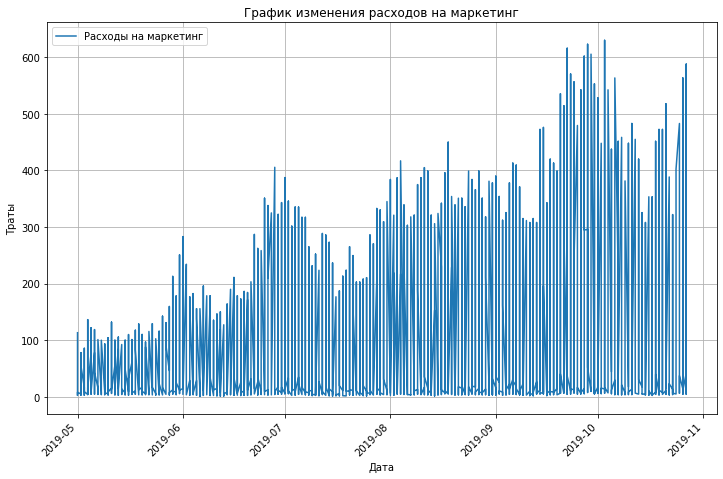

In [57]:
costs.plot(y='costs', # столбец значений для вертикальной оси,
           x='dt',
           figsize=(12, 8), # размеры картинки: (x_size, y_size)
           grid=True, # отображать сетку 
           rot=45,        
           label='Расходы на маркетинг', # название линии                       
           legend=True,# выводить ли легенду к графику
          ) 

plt.title('График изменения расходов на маркетинг')
plt.xlabel('Дата')
plt.ylabel('Траты')
plt.show()

Видим увеличение расходов на маркетинг с течением времени. В конце сентября - начале октября они достигли исторического пика в 630 у.е., после чего стали немного снижаться до 400, а затем к концу октября внось стремились к 600.

In [58]:
# выясним, как траты распределены по источникам
channel_costs_report = pd.DataFrame()
channel_costs_report['costs'] = costs.groupby('channel')['costs'].sum()
channel_costs_report['part'] = ((channel_costs_report['costs'] / costs['costs'].sum()) * 100)
channel_costs_report.sort_values(by='part', ascending=False).style.format({'part': '{:.2f}%', 'payer_share': '{:.2f}%'})

,costs,part
channel,,
TipTop,54751.300000,51.90%
FaceBoom,32445.600000,30.75%
WahooNetBanner,5151.000000,4.88%
AdNonSense,3911.250000,3.71%
OppleCreativeMedia,2151.250000,2.04%
RocketSuperAds,1833.000000,1.74%
LeapBob,1797.600000,1.70%
lambdaMediaAds,1557.600000,1.48%
MediaTornado,954.480000,0.90%


Больше всего трат приходитcя на источник TipTop (51.9%). Следом идет источник FaceBoom(30.75%). Далее идут низкозатратные источники WahooNetBanner (4.88%), AdNonSense (3.71%), OppleCreativeMedia (2.04%). На оставшиеся источники приходится 1-2% трат.

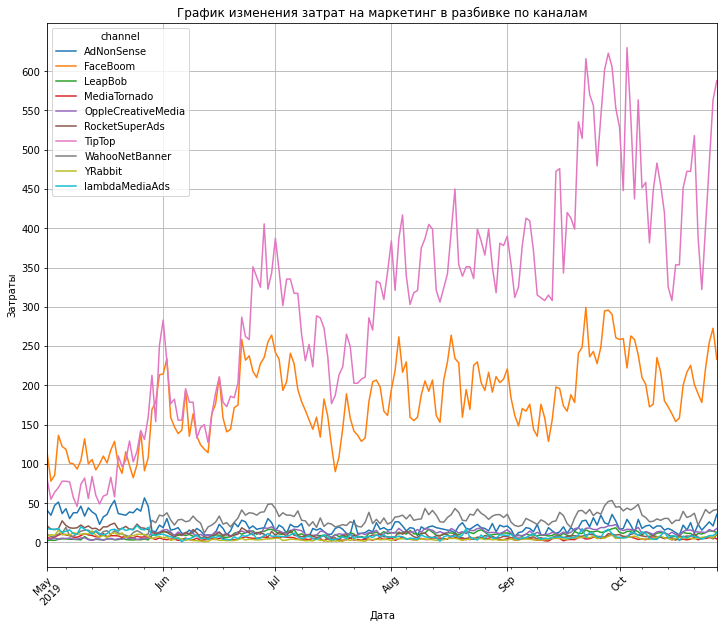

In [59]:
# визуализируем изменения метрик во времени
filtered_data = costs.pivot_table(
        index='dt', columns='channel', values='costs', aggfunc='sum'
    )
filtered_data.plot(                                             
           figsize=(12, 10), # размеры картинки: (x_size, y_size)
           grid=True, # отображать сетку 
           rot=45,        
           label='Каналы', # название линии                       
           legend=True, # выводить ли легенду к графику       
) 

plt.yticks(np.arange(0, 650, 50)) # зададим шаг по oy
plt.title('График изменения затрат на маркетинг в разбивке по каналам')
plt.xlabel('Дата')
plt.ylabel('Затраты')
plt.show()

На графике ярко выражены два лидера - это TipTop и FaceBoom. Больше всего трафика закупали у TipTop и к октябрю число трат приближалось к 650 у.е. Число трат на FaceBoom находится в районе 300. И если остальные источники не показывают какую-либо значительную динамику, то затраты на источник Tip-Top возрастают со временем. Остальные каналы привлечения обходятся довольно дешево. Возможно, стоит посмотреть на них в отдельном срезе, чтобы понять динамику, тк на этом графике данные по ним недостаточно показательны.

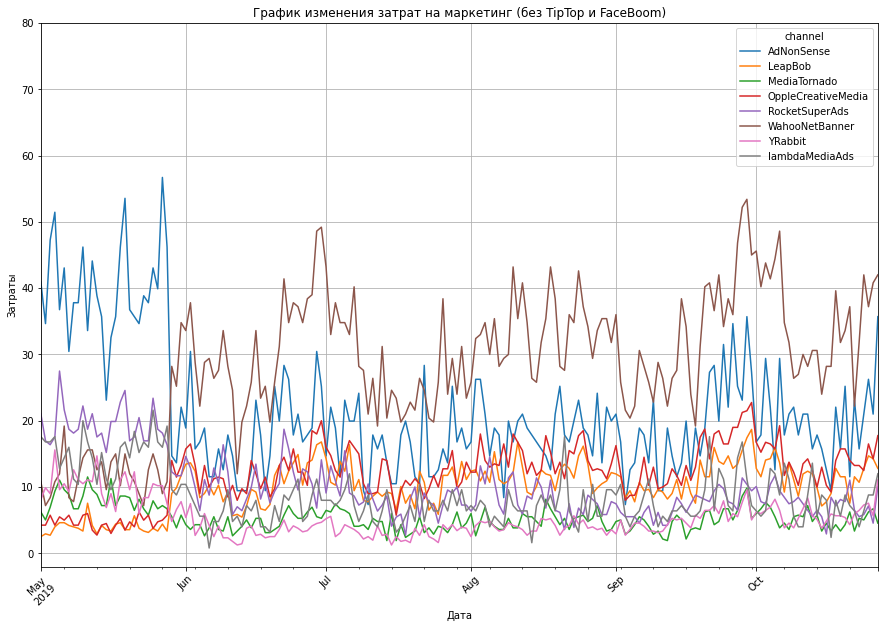

In [60]:
filtered_data2 = costs[~costs['channel'].isin(['TipTop', 'FaceBoom'])].pivot_table(
        index='dt', columns='channel', values='costs', aggfunc='sum'
    )

filtered_data2.plot(                                             
           figsize=(15, 10), # размеры картинки: (x_size, y_size)
           grid=True, # отображать сетку или нет
           rot=45,        
           label='Каналы', # название линии                       
           legend=True,# выводить ли легенду к графику
) 

plt.yticks(np.arange(0,  85, 10)) #зададим шаг по oy
plt.title('График изменения затрат на маркетинг (без TipTop и FaceBoom)')
plt.xlabel('Дата')
plt.ylabel('Затраты')
plt.show()

Среди рекламных источников кроме TipTop и FaceBoom с июня начали расти траты на WahooNetBanner (к октябрю их число было в районе 53 у.е.). Затраты на AdNonSense, наоборот, стали снижаться с июня 2019 года (с 55 до 35). По остальным источникам траты варьируются в пределах 3-20 у.е.

**4.2 Вясним, сколько в среднем стоило привлечение одного пользователя из каждого источника**

In [61]:
# рассчитаем средний CAC на одного пользователя для всего проекта и для каждого источника трафика 
profiles.head()

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:00,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:00,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:00,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:00,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:00,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769


In [62]:
profiles.describe()

,user_id,acquisition_cost
count,1.500080e+05,150008.000000
mean,4.993238e+11,0.703278
std,2.889483e+11,0.954097
min,5.993260e+05,0.000000
25%,2.489249e+11,0.000000
50%,4.977046e+11,0.247500
75%,7.494919e+11,1.108943
max,9.999996e+11,3.715385


Медианная стоимость привлечения одного пользователя - 0.24. При этом среднее находится на значении 0.7. Вероятно, в какие-то периоды мы тратили на пользователей больше, и в данных есть какие-то выбросы, которые влияют на разницу в стреднем и медианой. Максимальная стоимость привлечения пользователя - 3.71 у.е.

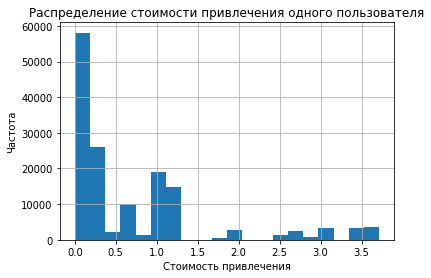

In [63]:
profiles['acquisition_cost'].hist(bins=20)
plt.title('Распределение стоимости привлечения одного пользователя')
plt.xlabel('Стоимость привлечения')
plt.ylabel('Частота')
plt.show()

На разницу между медианой и средним оказывает влияние большое число нулевой стоимости пользователей. Вероятно, это органический трафик.

In [64]:
# посмотрим на CAC для каждого источника трафика
cac_by_channel = pd.DataFrame()
cac_by_channel['acquisition_cost_mean'] = profiles.groupby('channel')['acquisition_cost'].mean()
cac_by_channel.sort_values(by='acquisition_cost_mean', ascending=False).style.format({'acquisition_cost_mean': '{:.2f}'})

,acquisition_cost_mean
channel,
TipTop,2.80
FaceBoom,1.11
AdNonSense,1.01
lambdaMediaAds,0.72
WahooNetBanner,0.60
RocketSuperAds,0.41
OppleCreativeMedia,0.25
YRabbit,0.22
MediaTornado,0.22


Самый дорогой трафик - TipTop (средняя стоимость - 2.80 за пользователя), далее идет FaceBoom и AdNonSense примерно в равной ценовой категории (1.11 и 1.01 соответственно). Органический трафик бесплатен, остальные каналы берут за пользователя от 0.21 до 0.72 у.е.

**Вывод**

В ходе анализа выяснили, что всего на маркетинг потратили 105497 у.е. Больше всего трат приходитcя на источник TipTop (51.9%) и  источник FaceBoom(30.75%). Далее идут низкозатратные источники WahooNetBanner (4.88%), AdNonSense (3.71%), OppleCreativeMedia (2.04%). На оставшиеся источники приходится 1-2% трат.
Визуализировано изменение метрик во времени. Заметны два лидера - это TipTop и FaceBoom. Больше всего трафика закупали у TipTop, и к октябрю число трат приближалось к 650 у.е. Число трат на FaceBoom находится в районе 300. Остальные каналы привлечения обходятся недорого.
Среди рекламных источников помимо TipTop и FaceBoom с июня начали расти траты на WahooNetBanner (к октябрю их число было в районе 53 у.е.). Затраты на AdNonSense, наоборот, стали снижаться с июня 2019 года (с 55 до 35). По остальным источникам траты варьируются в пределах 3-20 у.е.
Выяснено, сколько в среднем стоило привлечение одного пользователя из каждого источника.
Рассчитан средний CAC на одного пользователя для всего проекта и для каждого источника трафика. Медианная стоимость привлечения одного пользователя - 0.24. При этом среднее находится на значении 0.7. Вероятно, в какие-то периоды мы тратили на пользователей больше, и в данных есть какие-то выбросы, которые влияют на разницу в стреднем и медианой. Максимальная стоимость привлечения пользователя - 3.71 у.е.
На разницу между медианой и средним оказывает влияние большое число нулевой стоимости пользователей. Вероятно, это органический трафик.
Самый дорогой трафик - TipTop (средняя стоимость - 2.80 за пользователя), далее идет FaceBoom и AdNonSense примерно в равной ценовой категории (1.11 и 1.01 соответственно). Органический трафик бесплатен, остальные каналы берут за пользователя от 0.21 до 0.72 у.е.

# Шаг 5. Оцените окупаемость рекламы для привлечения пользователей

С помощью LTV и ROI:
- Проанализируйте общую окупаемость рекламы;
- Проанализируйте окупаемость рекламы с разбивкой по устройствам;
- Проанализируйте окупаемость рекламы с разбивкой по странам;
- Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам.

Опишите проблемы, которые вы обнаружили. Ответьте на вопросы:
- Окупается ли реклама, направленная на привлечение пользователей в целом? 
- Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
- Чем могут быть вызваны проблемы окупаемости? Изучите конверсию и удержание с разбивкой по устройствам, странам, рекламным каналам.

Опишите возможные причины обнаруженных проблем и сформируйте рекомендации для рекламного отдела. При решении этого шага считайте, что вы смотрите данные 1-го ноября 2019 года и что в вашей организации принято считать, что окупаемость должна наступать не позднее, чем через 2 недели после привлечения пользователей.

In [65]:
# согласно условиям момент анализа 
observation_date = datetime(2019, 11, 1).date()
# горизонт анализа
horizon_days = 14   

In [66]:
#исключим пользователей с органическим трафиком
profiles = profiles.query('channel != "organic"')

### Проанализируйте общую окупаемость рекламы

Для начала оценим общую ситуацию — посмотрим на окупаемость рекламы. Рассчитаем и визуализируем LTV и ROI, вызвав функции get_ltv() и plot_ltv_roi().

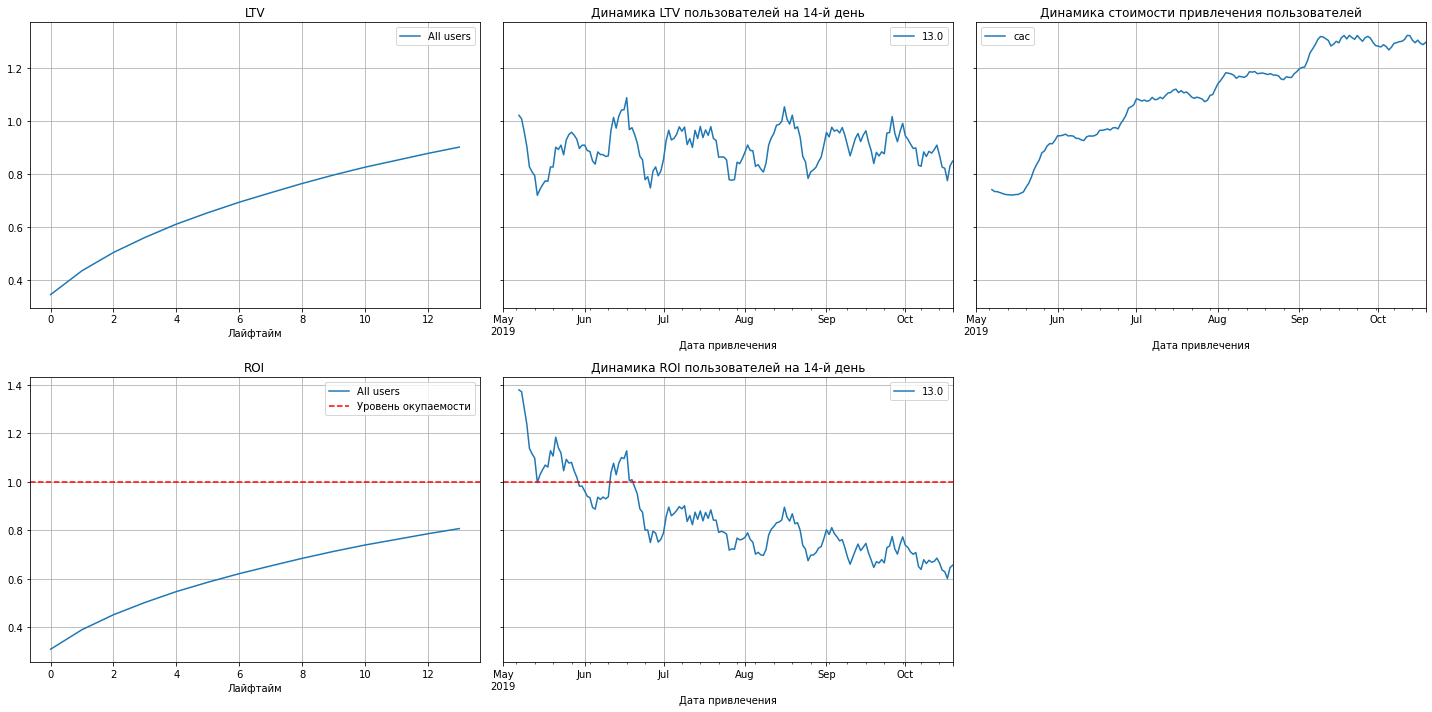

In [67]:
# считаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days
)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 


По графикам можно сделать такие выводы:

1. Реклама не окупается к концу 2й недели. ROI — около 80%.
2. CAC нестабилен. Рекламный бюджет увеличивается с течением времени.
3. На LTV влияет сезонный фактор, но в целом, этот показатель достаточно стабилен. Значит, дело не в ухудшении качества пользователей.
4. ROI пользователей падает. До июля показатель был выше уровня окупаемости, но после стал падать до 0.6.

Чтобы разобраться в причинах, необходимо рассмотреть все доступные характеристикам пользователей — страна, канал и устройство первого посещения.

### Проанализируйте окупаемость рекламы с разбивкой по устройствам

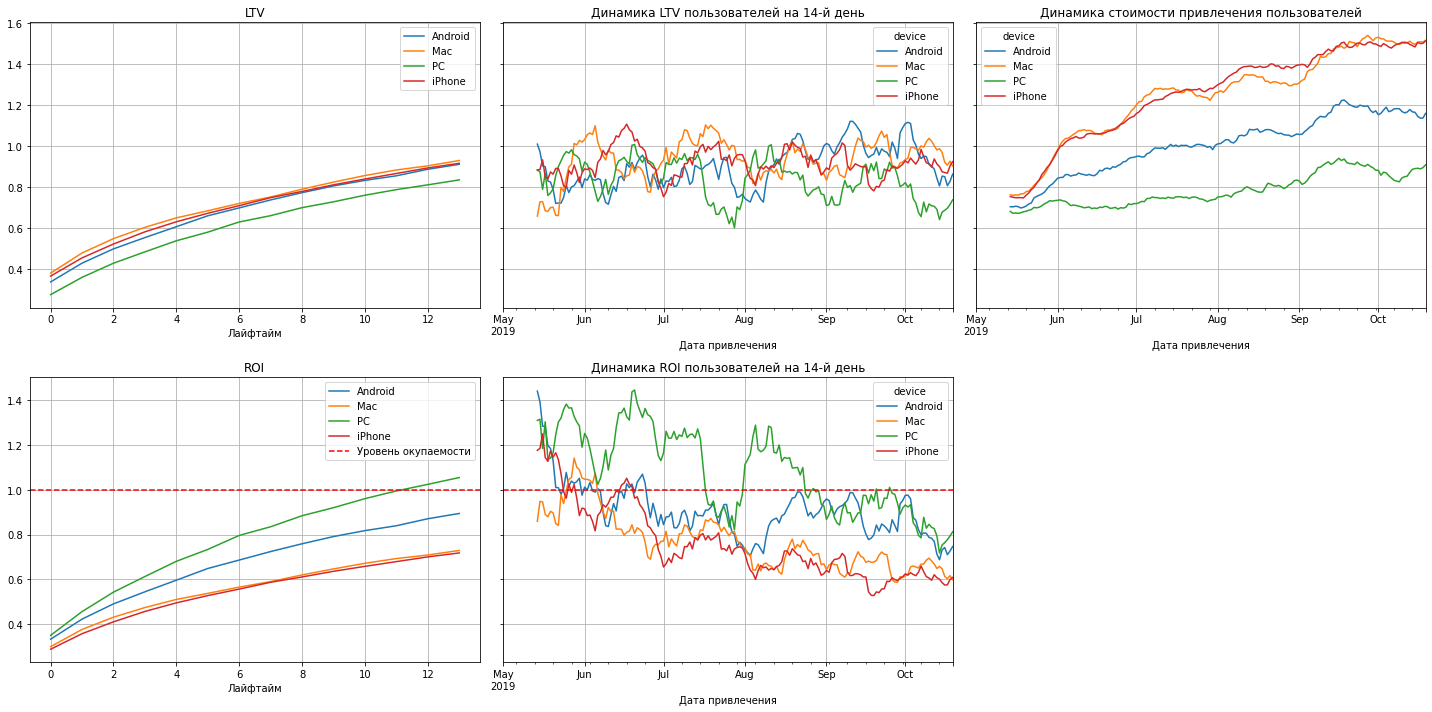

In [68]:
# перейдём к разбивке по устройствам
# смотрим окупаемость с разбивкой по устройствам

dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

Пользователи всех устройств окупались до июня, потом началось снижение, особенно для владельцев Mac и Iphone. К сентябрю (и какое-то время в августе) ROI пользователей PC на 14 день был на грани окупаемости, ROI всех остальных устройств был уже ниже уровня начиная с июня. LTV пользователей всё так же подвержен сезонности, но стабилен. Стоимость привлечения пользователей PC самая низкая, а ROI - наоборот, выше остальных. В целом, видим, что стоимость привлечения пользователей всех устройств росла за рассматриваемый период.

Направить внимание следует на владельцев Mac и iPhone - стоимость их привлечения высока (и растет от месяца к месяцу), а окупаемоcть страдает.

Посчитаем и визуализируем конверсию, вызвав функции get_conversion() и plot_conversion()

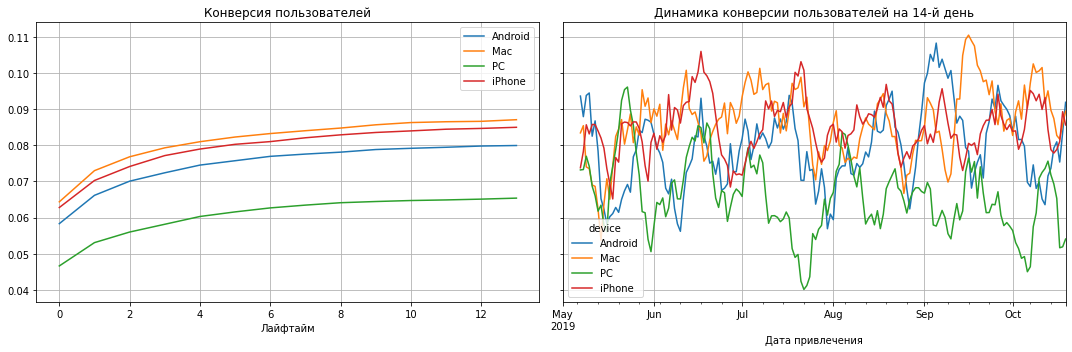

In [69]:
dimensions = ['device']
# смотрим конверсию с разбивкой по устройствам

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

Судя по графикам, пользователи Mac, Android и iPhone конвертируются хорошо, причём постоянно. Видимо, дело в удержании. Вызовем функции get_retention() и plot_retention(), чтобы рассчитать и отразить на графиках этот показатель.

In [70]:
# функция для расчёта удержания

def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

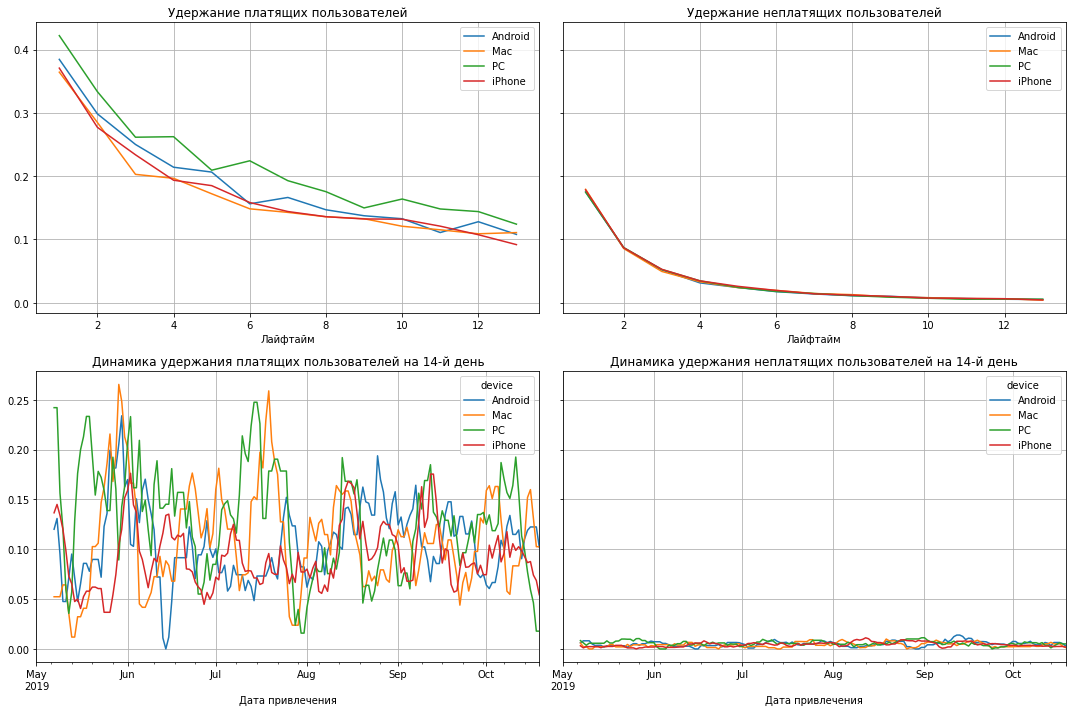

In [71]:
# смотрим удержание с разбивкой по устройствам
dimensions = ['device']

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

Не видно, чтобы пользователи каких-то определенных устройств особо плохо удерживались. Неплатящие пользователи удерживаются стабильно плохо, а из платящих лучше всего удерживаются пользователи PC, хуже - владельцы iPhone и Mac.

### Проанализируйте окупаемость рекламы с разбивкой по странам

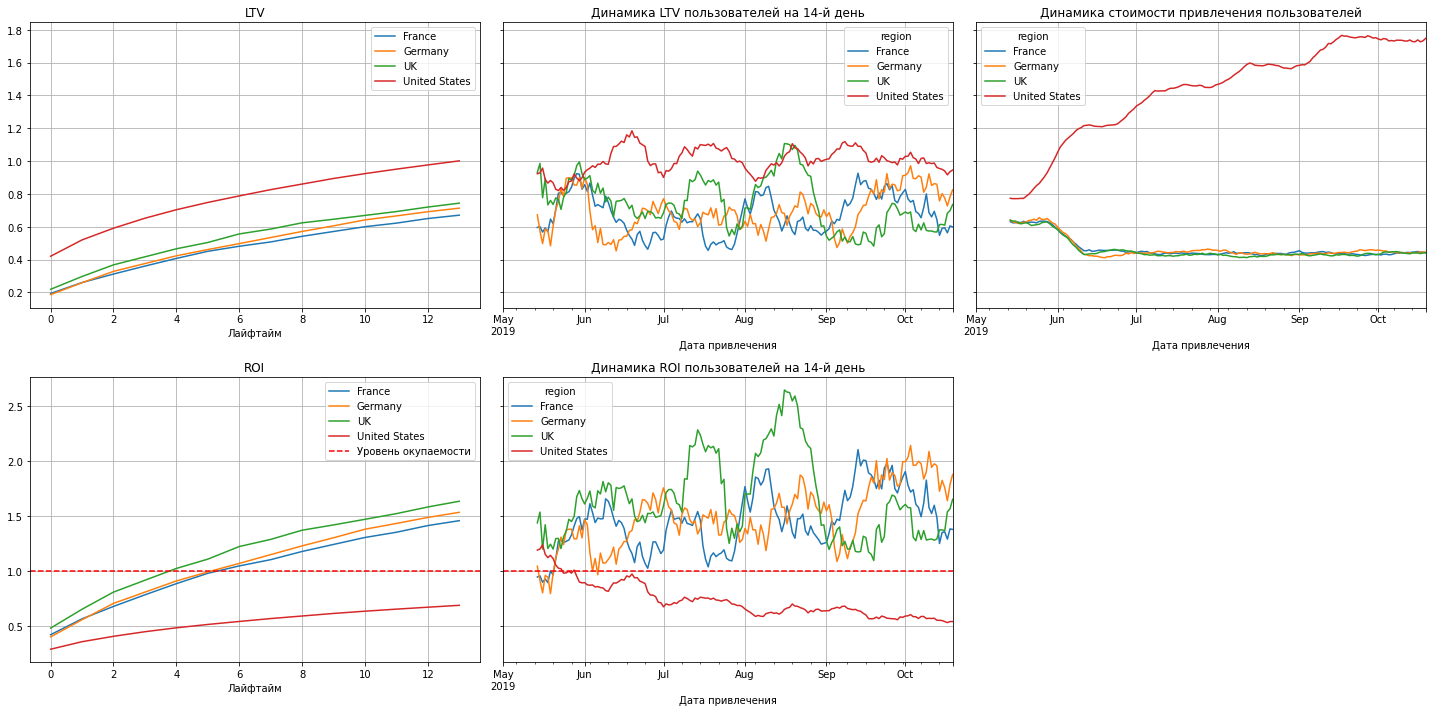

In [72]:
# смотрим окупаемость с разбивкой по странам

dimensions = ['region']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

Из графика видно:

1. Реклама окупается не везде. В США уровень окупаемости рекламы низкий и основная аудитория - это пользователи из США.
2. При этом стоимость привлечения пользователей из Америки - самая высокая. И она растет.
3. LTV всё так же подвержен сезонности, но стабилен.
4. Лучше всего окупается Великобритания и Германия. Явный аутсайдер - США. Причем окупаемость пользователей начала падать с конца июня 2019 года. Возможно, неудачный релиз, запуск похожего продукта у конкурентов или какие-то  изменения в продукте сыграли такую роль, и сервис стал менеее привлекательным для пользователей.

Значит, надо направить внимание на пользователей из США.

Посчитаем и визуализируем конверсию, вызвав функции get_conversion() и plot_conversion()

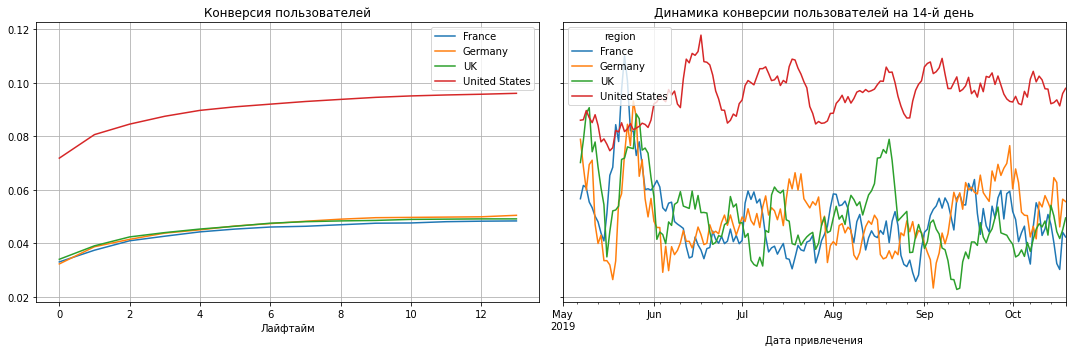

In [73]:
# смотрим конверсию с разбивкой по странам

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

Слабая конверсия у пользователей из Великобритании, Германии и Франции. Но и их доля относительно всех пользователей не такая большая.

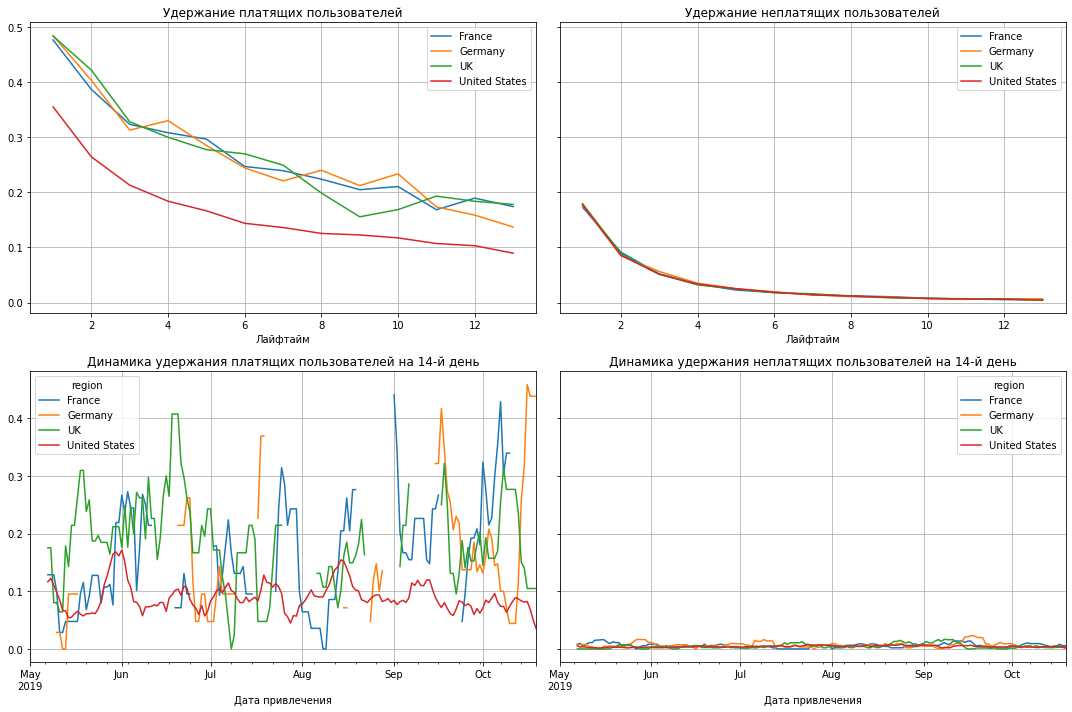

In [74]:
# смотрим удержание с разбивкой по странам

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

Видим, что пользователи из США явно плохо удерживаются.

<div class="alert alert-success">

**✔️ Комментарий ревьюера ✔️**
   
   Да, по США определенно нaблюдаются проблемы. Молодец, что ты это заметила👍

</div>


### Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам

Теперь проверим источники привлечения (channel). Возможно, на окупаемость влияет неудачная реклама в каком-нибудь одном канале.

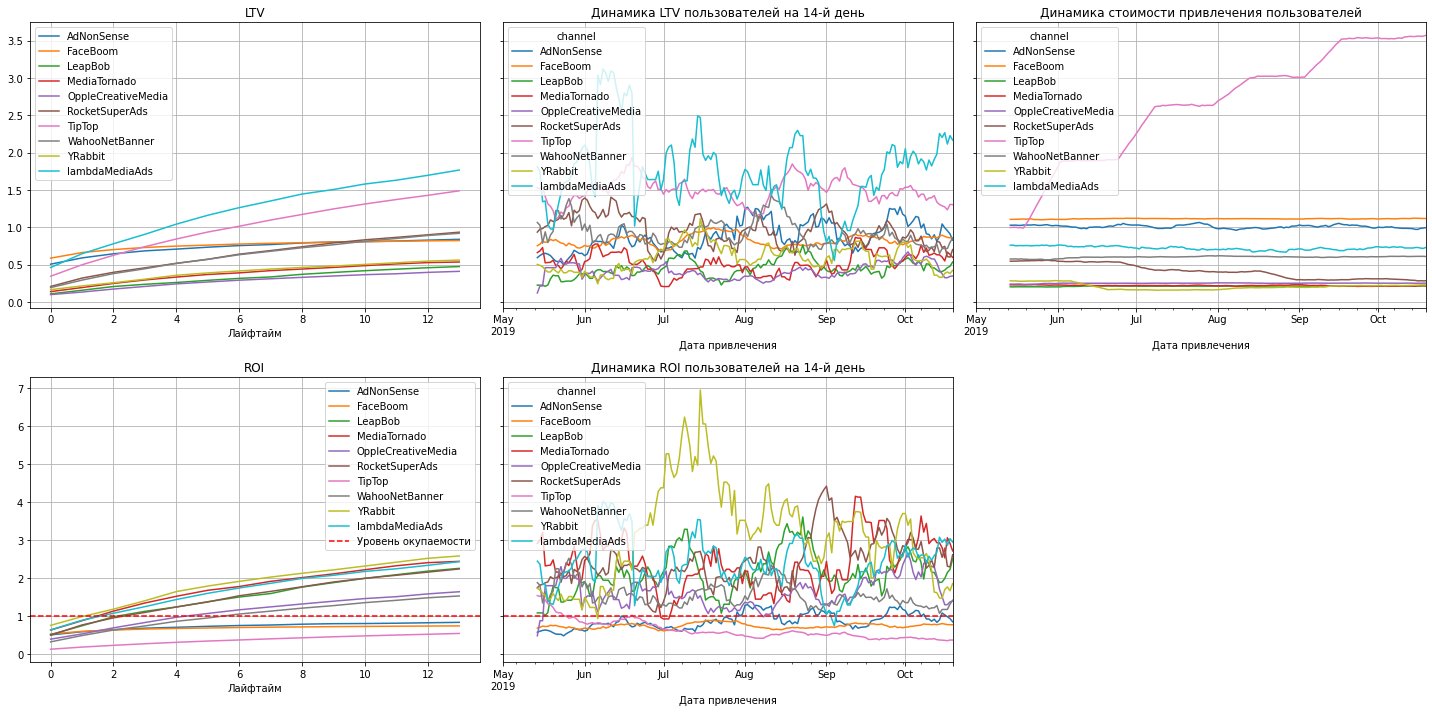

In [75]:
# смотрим окупаемость с разбивкой по источникам привлечения

dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

Видим большой рост стоимости привлечения пользователей из рекламного канала TipTop. Кажется, слишком много средств было потрачено на эту рекламную сеть, но притока от нее получилось не так много, как ожидалось.
Не окупаются пользователи, привлеченные из каналов LeapBop, FaceBoom, TipTop.
Хорошо показала себя рекламная сеть YRabbit в июле - ROI пользователей на 14 день был высок.

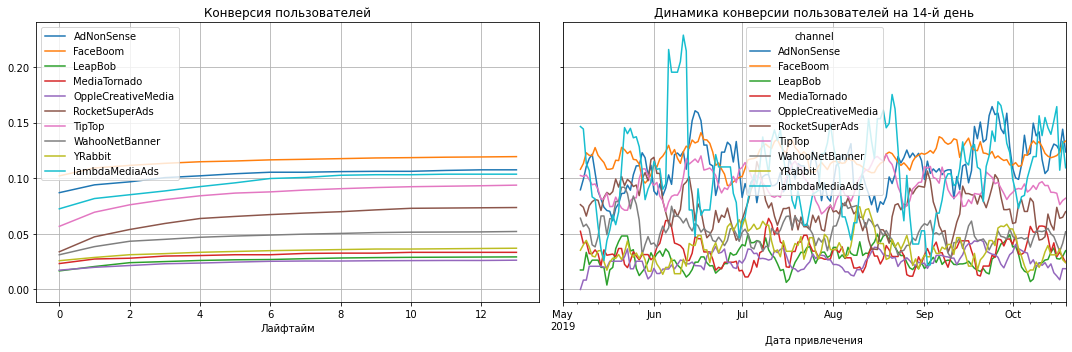

In [76]:
# смотрим конверсию с разбивкой по каналам

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

Плохо конвертируются пользователи из каналов RocketSuperAds, MediaTornado, YRabbit.

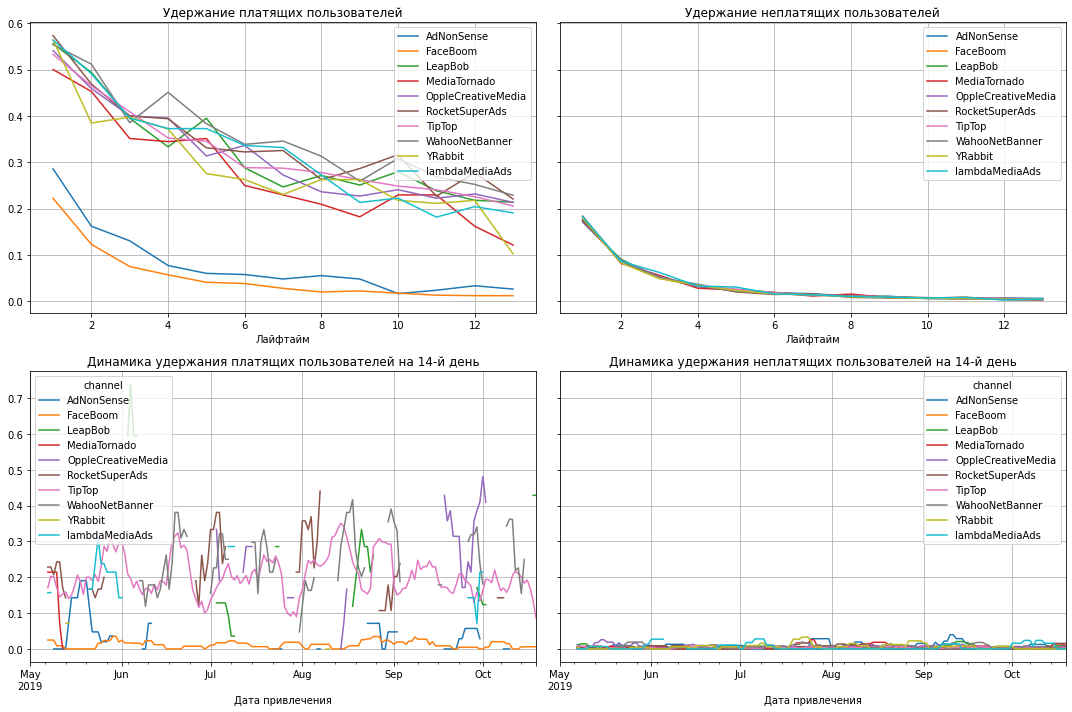

In [77]:
# смотрим удержание с разбивкой по каналам

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

Видим явных аутсайдеров - плохо удерживаются пользователи из каналов FaceBoom и AdNonSense

**Вывод**

В целом, реклама близка к окупаемости, если учитывать, что на календаре 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения и то, что в анализ включены органические пользователи (не будем исключать влияние SEO). Реклама почти окупается к концу 2й недели. ROI — примерно 80%
Окупаемость могут снижать владельцы Mac и iPhone, страна - США. Не окупаются пользователи, привлеченные из каналов LeapBop, FaceBoom, TipTop.
Проблемы окупаемости могут быть вызваны ненормированным распределением средств на рекламу (в какой-то источник вложено больше средств, чем в остальные, а он не оправдал надежд), также возможно, что горизонт анализа недостаточен для того, чтобы пользователи окупились.

# Шаг 6. Напишите выводы
- Выделите причины неэффективности привлечения пользователей;
- Сформируйте рекомендации для отдела маркетинга для повышения эффективности.

Оценена окупаемость рекламы. Рассчитан и визуализирован LTV и ROI. По графикам сделаны следующие выводы:

Реклама не окупается к концу 2й недели. ROI — около 80%.
CAC нестабилен. Рекламный бюджет увеличивается с течением времени.
На LTV влияет сезонный фактор, но в целом, этот показатель достаточно стабилен. 
ROI пользователей падает. До июля показатель был выше уровня окупаемости, но после стал падать до 0.6.
Чтобы разобраться в причинах, рассмотрелли все доступные характеристикам пользователей — страну, канал и устройство первого посещения.

Пользователи всех устройств окупались до июня, а потом произошло изменение, особенно для владельцев Mac и Iphone. К сентябрю (и какое-то время в августе) ROI пользователей PC на 14 день был на грани окупаемости, ROI всех остальных устройств был уже ниже уровня начиная с июня. LTV пользователей всё так же подвержен сезонности, но стабилен. Стоимость привлечения пользователей PC самая низкая, а ROI - наоборот, выше остальных. В целом, стоимость привлечения пользователей всех устройств росла за рассматриваемый период.

Направить внимание следует на владельцев Mac и iPhone - стоимость их привлечения высока. Посчитана и визуализирована конверсия. Судя по графикам, пользователи Mac, Android и iPhone конвертируются неплохо, причём постоянно. Видимо, дело в удержании. Для проверки удержания использовались функции get_retention() и plot_retention(). Неплатящие пользователи удерживаются стабильно плохо, а из платящих лучше всего удерживаются пользователи PC, хуже - владельцы iPhone и Mac.

Реклама окупается не везде. В США уровень окупаемости рекламы низкий. При этом стоимость привлечения пользователей из Америки - самая высокая. LTV всё так же подвержен сезонности, но стабилен. Лучше всего окупается Великобритания и Германия. Явный аутсайдер - США. Причем окупаемость пользователей начала падать с конца июня 2019 года. Возможно, неудачный релиз, запуск похожего продукта у конкурентов или какие-то  изменения в продукте сыграли такую роль, и сервис стал менеее привлекательным для пользователей.
Значит, надо направить внимание на пользователей из США. Слабая конверсия у пользователей из Великобритании, Германии и Франции. Но и их доля относительно всех пользователей не такая большая. Видно также, что пользователи из США явно плохо удерживаются.

Видим большой рост стоимости привлечения пользователей из рекламного канала TipTop. Не окупаются пользователи, привлеченные из каналов LeapBop, FaceBoom, TipTop. Хорошо показала себя рекламная сеть YRabbit в июле - ROI пользователей на 14 день был высок.
Плохо конвертируются пользователи из каналов RocketSuperAds, MediaTornado, YRabbit.
Видим явных аутсайдеров - плохо удерживаются пользователи из каналов FaceBoom и AdNonSense.

Направить внимание по окупаемости следует на владельцев Mac и iPhone - стоимость их привлечения высока (и растет от месяца к месяцу), а окупаемоcть нет. Возможно, стоит сделать какое-то маркетинговое предложение именно для владельцев устройств на базе этих ОС, чтобы они приносили продукту большую денежную ценность.

Для пользователей из США в целом уровень окупаемости рекламы низкий, при этом основная аудитория - это пользователи из США. При этом стоимость привлечения пользователей из Америки - самая высокая. Поэтому стоит также направить силы на балансировку затрат на рекламу по странам.

Лучше всего окупается Великобритания и Германия. Возможно, стоит попробовать закупить больше трафика, целясь на эту аудиторию. Явный аутсайдер по окупаемости - США. Причем окупаемость пользователей начала падать с конца июня 2019 года - стоит также разобраться, что могло послужить причиной.

Виден большой рост стоимости привлечения пользователей из рекламного канала TipTop. Возможно, стоит уменьшить бюджет, выделяемый на эту сеть и перенаправить его на более эффективный канал.
Необходимо переключить внимание на более дешевые, но прибыльные каналы.

Еще можно попробовать применить силу социальных сетей - они сейчас очень динамично развиваются и являются мощным источником привлечения новых пользователей, имеют большой охват и относительно невысокую стоимость.


    
Отделу маркетингу возможно стоит использовать более эффективные каналы для продвижения в США. Т.е. перераспределить ресурсы на новые площадки и следить за изменениями в аналитике этих каналов. Проявить гибкость и оперативно войти в новую развивающуюся социальную сеть. TipTop - очень дорогой канал, тянущий деньги.
Возможно на канале FaceBoom для удержания клиентов необходимо протестировать ряд скидочнных предложений для клиентов, снизить цены на некоторые товаров для клиентов этого канала или специальные пакетные предложения.  

    
